<h1>IDENTIFICACION DE PATRONES DE VIAJES COMPARTIDOS DE LA EMPREZA ZUBER</h1>

Estás trabajando como analista para Zuber, una nueva empresa de viajes compartidos que se está lanzando en Chicago. Tu tarea es encontrar patrones en la información disponible. Quieres comprender las preferencias de los pasajeros y el impacto de los factores externos en los viajes.

Al trabajar con una base de datos, analizarás los datos de los competidores y probarás una hipótesis sobre el impacto del clima en la frecuencia de los viajes.


<h2>1.- IMPORTANDO LIBRERIAS</h2>

In [282]:
# Import libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

<h2>2.- IMPORTANDO BASE DE DATOS</h2>

In [251]:
# Cargamos los archivos csv"
sql_result_01 = pd.read_csv("dataset/moved_project_sql_result_01.csv") 
sql_result_04 = pd.read_csv("dataset/moved_project_sql_result_04.csv") 
sql_result_07 = pd.read_csv("dataset/moved_project_sql_result_07.csv") 
 

<h2>3.- EXPLORACION DE LA DATA</h2>

### 3.1. sql_result_01

Contiene los siguientes datos:
- `company_name`: nombre de la empresa de taxis
- `trips_amount`: el número de viajes de cada compañía de taxis el 15 y 16 de noviembre de 2017. 

In [252]:
sql_result_01.info()
print()
print(sql_result_01.describe())
print()
sql_result_01.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB

       trips_amount
count     64.000000
mean    2145.484375
std     3812.310186
min        2.000000
25%       20.750000
50%      178.500000
75%     2106.500000
max    19558.000000



,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


Se tienen 64 filas de data en el DF `sql_result_01`, no se aprecia data `NaN` y los formatos de las columnas son las correctas.

### 3.2. sql_result_04

Contiene los siguientes datos:
- `dropoff_location_name`: barrios de Chicago donde finalizaron los viajes
- `average_trips`: el promedio de viajes que terminaron en cada barrio en noviembre de 2017. 

In [253]:
sql_result_04.info()
print()
print(sql_result_04.describe())
print()
sql_result_04.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB

       average_trips
count      94.000000
mean      599.953728
std      1714.591098
min         1.800000
25%        14.266667
50%        52.016667
75%       298.858333
max     10727.466670



,dropoff_location_name,average_trips
0,Loop,10727.466670
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


Se tienen 94 filas de data en el DF `sql_result_04`, no se aprecia data `NaN` y los formatos de las columnas son las correctas.

### 3.3. sql_result_07

Contiene datos sobre viajes desde el Loop hasta el Aeropuerto Internacional O'Hare. Recuerda, estos son los valores de campo de la tabla:
- `start_ts`: fecha y hora de la recogida
- `weather_conditions`: condiciones climáticas en el momento en el que comenzó el viaje
- `duration_seconds`: duración del viaje en segundos

In [254]:
sql_result_07.info()
print()
print(sql_result_07.describe())
print()
sql_result_07.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB

       duration_seconds
count       1068.000000
mean        2071.731273
std          769.461125
min            0.000000
25%         1438.250000
50%         1980.000000
75%         2580.000000
max         7440.000000



,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 7:00:00,Good,1440.0


Se tienen 1068 filas de data en el DF `sql_result_07`, no se aprecia data `NaN` y es necesario modificar el tipo de data de  la columna `start_ts` de object (string) a date. Asimismo la duracion minima de los viajes es 0 segundos, lo cual es erroneo.

<h2>4.- PRE PROCESAMIENTO DE DATA</h2>

### 4.1. CORRECION DEL TIPO DE DATO DE LA COLUMNA `start_ts` de la DF sql_result_07

In [255]:
# Cambiando el tipo de dato de la columna 'start_ts' a datetime
sql_result_07['start_ts'] = pd.to_datetime(sql_result_07['start_ts'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# Creamos las columnas 'Fecha', 'Hora' y 'Dia_semana'
sql_result_07['Fecha'] = sql_result_07['start_ts'].dt.date
sql_result_07['Hora'] = sql_result_07['start_ts'].dt.time
sql_result_07['Dia_semana'] = sql_result_07['start_ts'].dt.day_name()

sql_result_07.info()
print()
sql_result_07.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
 3   Fecha               1068 non-null   object        
 4   Hora                1068 non-null   object        
 5   Dia_semana          1068 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 50.2+ KB



,start_ts,weather_conditions,duration_seconds,Fecha,Hora,Dia_semana
0,2017-11-25 16:00:00,Good,2410.0,2017-11-25,16:00:00,Saturday
1,2017-11-25 14:00:00,Good,1920.0,2017-11-25,14:00:00,Saturday
2,2017-11-25 12:00:00,Good,1543.0,2017-11-25,12:00:00,Saturday
3,2017-11-04 10:00:00,Good,2512.0,2017-11-04,10:00:00,Saturday
4,2017-11-11 07:00:00,Good,1440.0,2017-11-11,07:00:00,Saturday


### 4.2. CONTEO DE LA CANTIDAD DE VIAJES POR DIA DE RECOJO.

In [256]:
# Contamos la catidad de viajes de los dias de recojo de los viajes
print(sql_result_07.value_counts('Fecha'))
print()
# Contamos la catidad de viajes de los dias de recojo de los viajes
print(sql_result_07.value_counts('Dia_semana'))

Fecha
2017-11-11    426
2017-11-04    367
2017-11-18    180
2017-11-25     95
Name: count, dtype: int64

Dia_semana
Saturday    1068
Name: count, dtype: int64


Todos los viajes realizado dentro de la DF `sql_result_07` se realizaron los dias `Saturday / Sabado`

### 4.3. ELIMINACION DE LOS VIAJES CON 0 SEGUNDOS DE DURACION DE LA DF sql_result_07

In [257]:
# Filtramos y eliminamos los datos 0 la data frame sql_result_07
sql_result_07 = sql_result_07.query("duration_seconds != 0")
sql_result_07

,start_ts,weather_conditions,duration_seconds,Fecha,Hora,Dia_semana
0,2017-11-25 16:00:00,Good,2410.0,2017-11-25,16:00:00,Saturday
1,2017-11-25 14:00:00,Good,1920.0,2017-11-25,14:00:00,Saturday
2,2017-11-25 12:00:00,Good,1543.0,2017-11-25,12:00:00,Saturday
3,2017-11-04 10:00:00,Good,2512.0,2017-11-04,10:00:00,Saturday
4,2017-11-11 07:00:00,Good,1440.0,2017-11-11,07:00:00,Saturday
...,...,...,...,...,...,...
1062,2017-11-11 06:00:00,Good,1500.0,2017-11-11,06:00:00,Saturday
1064,2017-11-11 10:00:00,Good,1318.0,2017-11-11,10:00:00,Saturday
1065,2017-11-11 13:00:00,Good,2100.0,2017-11-11,13:00:00,Saturday
1066,2017-11-11 08:00:00,Good,1380.0,2017-11-11,08:00:00,Saturday


<h2>5.- PROCESAMIENTO DE DATA</h2>

### 5.1. IDENTIFICAR LOS 10 PRINCIPALES BARRIOS EN TERMINOS DE FINALIZACION DEL RECORRIDO.

In [258]:
# IDENTIFICAMOS LOS BARRIOS PRINCIPALES EN BASE AL PROMEDIO DE VIAJES QUE TERMINARON EN ESE BARRIO
# USANDO LA COLUMNA 'average_trips'
top_10_barrios = (sql_result_04.sort_values(by= 'average_trips', ascending=False)).head(10)

# Redondeamos los valores de y convertimos a valor entero 'int'
top_10_barrios['average_trips'] = top_10_barrios['average_trips'].round(0).astype('int')

top_10_barrios


,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9524
2,Streeterville,6665
3,West Loop,5164
4,O'Hare,2547
5,Lake View,2421
6,Grant Park,2069
7,Museum Campus,1510
8,Gold Coast,1364
9,Sheffield & DePaul,1260


Vemos que en la lista de principales barrios donde termino el recorrido, el barrio `Loop` y `River North` son los mas popular del top 10 con 10000 viajes en promedio.

### 5.2. GRAFICOS 1: 10 BARRIOS PRINCIPALES POR NUMERO DE FINALIZACIONES

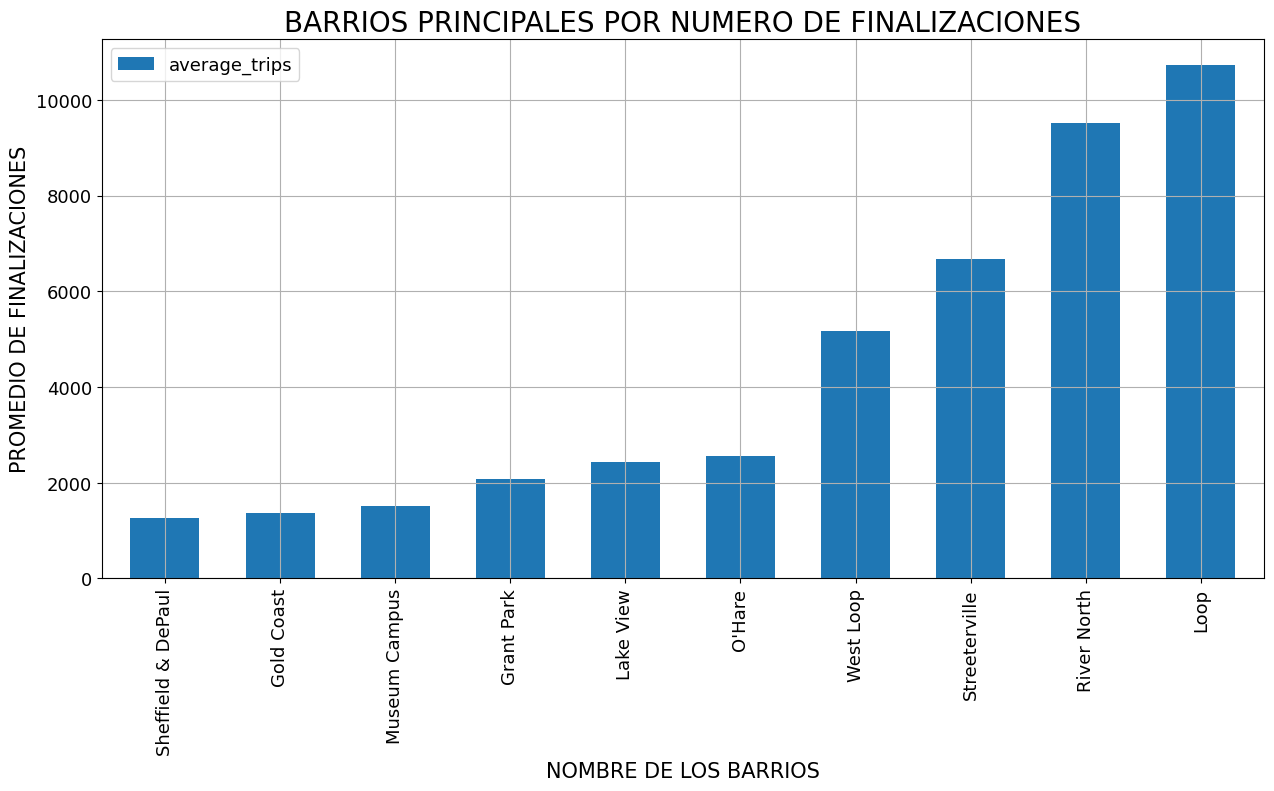

In [259]:
barrios_10_graf = top_10_barrios.sort_values(by='average_trips', ascending= True)
ax = barrios_10_graf.plot(kind='bar', x='dropoff_location_name', y='average_trips', 
                     grid=True, 
                     figsize=(15, 7), 
                     width=0.6)

ax.tick_params(axis='x', labelsize=13)
ax.tick_params(axis='y', labelsize=13)
ax.set_title('BARRIOS PRINCIPALES POR NUMERO DE FINALIZACIONES', fontsize=20)
ax.set_xlabel('NOMBRE DE LOS BARRIOS', fontsize=15)
ax.set_ylabel('PROMEDIO DE FINALIZACIONES', fontsize=15)
ax.legend(fontsize=13)
plt.show()

### 5.3. GRAFICOS 2: EMPRESAS DE TAXI Y SUS NUMERO DE VIAJES

La DF sql_result_01 contiene la data de las empresas de taxi y el numero de viajes de cada compania los dias 15 y 16 de noviembre del 2017.

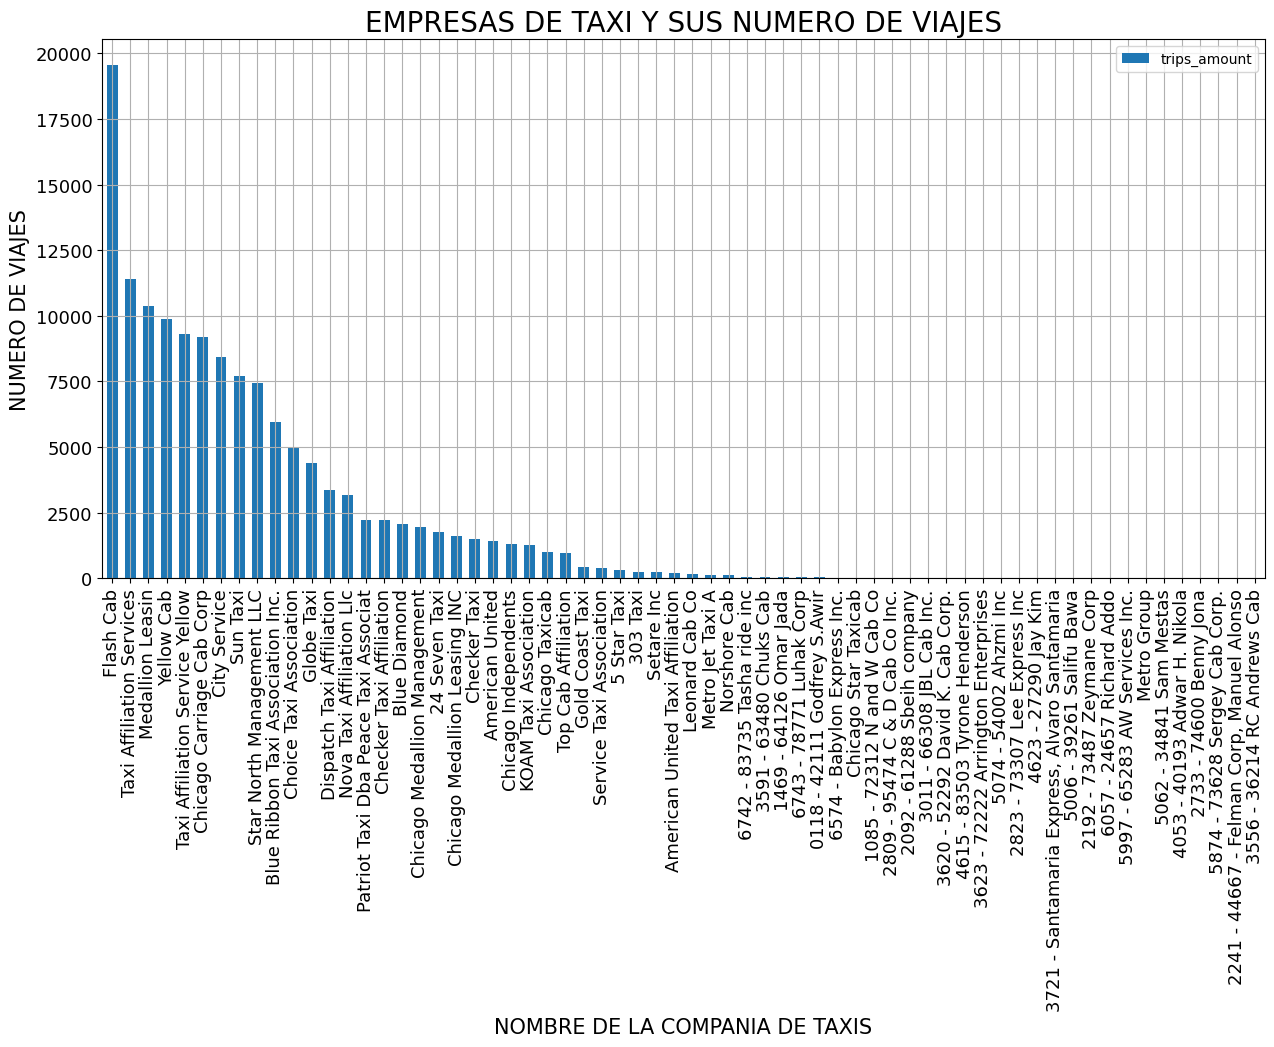

In [260]:
ax = sql_result_01.plot(kind='bar', x='company_name', y='trips_amount', 
                     grid=True, 
                     figsize=(15, 7), 
                     width=0.6)

ax.tick_params(axis='x', labelsize=13)
ax.tick_params(axis='y', labelsize=13)
ax.set_title('EMPRESAS DE TAXI Y SUS NUMERO DE VIAJES', fontsize=20)
ax.set_xlabel('NOMBRE DE LA COMPANIA DE TAXIS', fontsize=15)
ax.set_ylabel('NUMERO DE VIAJES', fontsize=15)

plt.show()


Se aprecia que la cantidad de viajes de la mayoria de companias de taxi no reprecenta importancia en la grafica, por lo que graficaremos las primeras 20 companias.

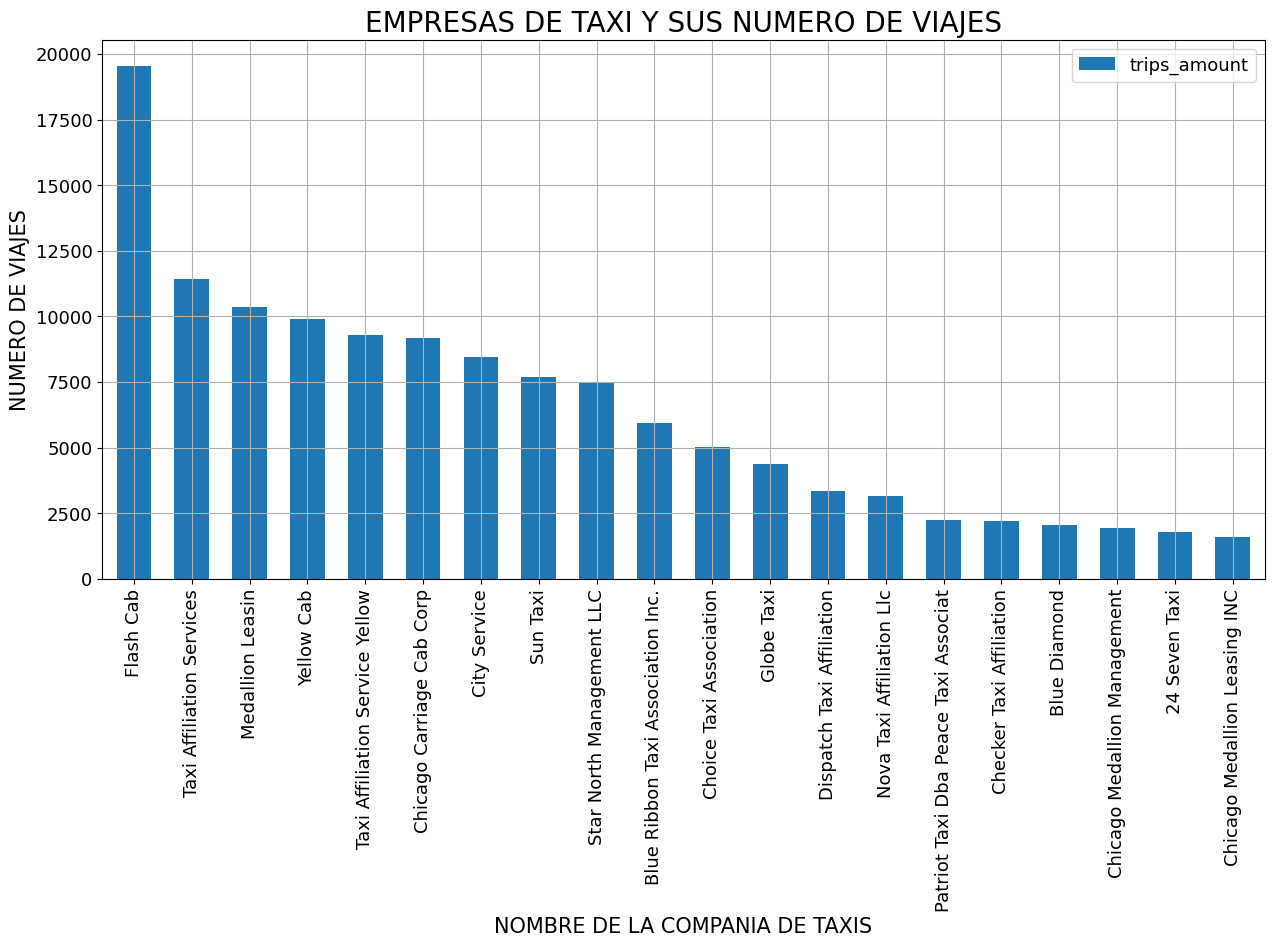

In [261]:
companias20 = sql_result_01.sort_values(by='trips_amount', ascending=False).head(20)
barrios_10_graf = top_10_barrios.sort_values(by='average_trips', ascending= True)
ax = companias20.plot(kind='bar', x= 'company_name', y='trips_amount', 
                     grid=True, 
                     figsize=(15, 7), 
                     width=0.6)

ax.tick_params(axis='x', labelsize=13)
ax.tick_params(axis='y', labelsize=13)
ax.set_title('EMPRESAS DE TAXI Y SUS NUMERO DE VIAJES', fontsize=20)
ax.set_xlabel('NOMBRE DE LA COMPANIA DE TAXIS', fontsize=15)
ax.set_ylabel('NUMERO DE VIAJES', fontsize=15)
ax.legend(fontsize=13)
plt.show()

In [262]:
# Mostramos la tabla de las 20 primeras companias
companias20.head(20)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


La compania `Flash Cab` es la mas activa con casi 20,000 viajes entre los dias 15 y 16 de noviembre del 2017, seguida de la compania `Taxi Affiliation Services`

### 5.4. CONCLUSIONES:
Despues del analisi de la data, se puede visualizar la preferencia del uso del sevicio de Zuber en el barrio de `Loop` y que la compania con mas viajes es `Flash Cab`.

<h2>6.- PRUEBA DE HIPOTESIS

Prueba la hipótesis:

`La duración promedio de los viajes desde `Loop` hasta el `Aeropuerto Internacional O'Hare` cambia los sábados lluviosos.`

The hypothesis statement is not clear on how to group the data. There are two options for grouping the data, one based on overall weather conditions, and one based on whether it rained for at least an hour on a particular Sunday. Without clarification from a colleague, we will explore both options and discuss the limitations of each approach when conducting tests.

To test both hypotheses, we will use a t-test which is commonly used when comparing the means of two populations from a dataset. However, it's important to keep in mind that the t-test is sensitive to outliers, as it is based on the sample mean and variance. Therefore, it's crucial to check for statistical outliers before running the test.

### 6.1. FORMULACION DE HIPOTESIS:
 - `HIPOTESIS NULA`: La duracion promedio de los viajes desde Loop hasta el Aereopuerto Internacional O'Hare son iguales los sabados lluviosos.

 - `Hipotesis Alternativa`:  La duracion promedio de los viajes desde Loop hasta el Aereopuerto Internacional O'Hare cambia los sabados lluviosos.

### 6.2. ANALISIS DE DATA:

In [263]:
sql_result_07.head(5)

,start_ts,weather_conditions,duration_seconds,Fecha,Hora,Dia_semana
0,2017-11-25 16:00:00,Good,2410.0,2017-11-25,16:00:00,Saturday
1,2017-11-25 14:00:00,Good,1920.0,2017-11-25,14:00:00,Saturday
2,2017-11-25 12:00:00,Good,1543.0,2017-11-25,12:00:00,Saturday
3,2017-11-04 10:00:00,Good,2512.0,2017-11-04,10:00:00,Saturday
4,2017-11-11 07:00:00,Good,1440.0,2017-11-11,07:00:00,Saturday


Visualizacion de la data:

[Text(0.5, 1.0, "Duracion de los viajes desde el barrio de Loop al Aereopurto O'Hare "),
 Text(0.5, 0, 'Fecha de recojo'),
 Text(0, 0.5, 'Duracion del viaje (seg)')]

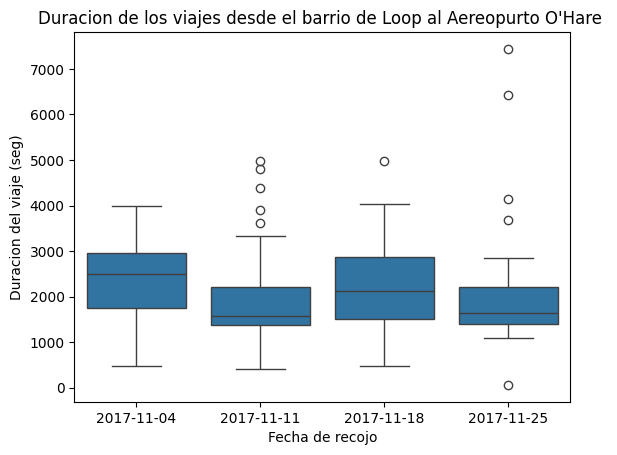

In [264]:
# Diagrama de bloques
sql_result_07 = sql_result_07.sort_values(by='Fecha', ascending=True)
sns.boxplot(data = sql_result_07, x = 'Fecha', y = 'duration_seconds').\
            set(title = "Duracion de los viajes desde el barrio de Loop al Aereopurto O'Hare ",
                                                 xlabel = 'Fecha de recojo', 
                                                 ylabel = 'Duracion del viaje (seg)')

Observaciones del grafico:
- Previamente ya se eliminaron los viajes tienen una duracion de 0 segundos.
- Algunos viajes tiene una duracion entre 0 a 2000 segundos, los cuales se encuentran fuera del primer cuartil.
- Hubieron viajes con mas de 3000 segundos de duracion (fuera del tercer cuartil), podemos suponer que estos viajes tuvieron retrasos por diversas condiciones como condiciones climaticas, trafico, accidentes, etc.

Se procedera a eliminar estos valores atipicos.

In [271]:
# Filtramos y Eliminamos los datos atipicos
result_07 = sql_result_07[(sql_result_07['duration_seconds'] > 1499)\
    & (sql_result_07['duration_seconds'] < 3501)]
result_07



,start_ts,weather_conditions,duration_seconds,Fecha,Hora,Dia_semana
1067,2017-11-04 16:00:00,Bad,2834.0,2017-11-04,16:00:00,Saturday
456,2017-11-04 13:00:00,Good,3394.0,2017-11-04,13:00:00,Saturday
455,2017-11-04 16:00:00,Bad,2820.0,2017-11-04,16:00:00,Saturday
454,2017-11-04 10:00:00,Good,1860.0,2017-11-04,10:00:00,Saturday
928,2017-11-04 11:00:00,Good,2400.0,2017-11-04,11:00:00,Saturday
...,...,...,...,...,...,...
420,2017-11-25 11:00:00,Good,1680.0,2017-11-25,11:00:00,Saturday
435,2017-11-25 12:00:00,Good,1553.0,2017-11-25,12:00:00,Saturday
436,2017-11-25 15:00:00,Good,2204.0,2017-11-25,15:00:00,Saturday
931,2017-11-25 17:00:00,Good,2220.0,2017-11-25,17:00:00,Saturday


### 6.3. EJECUCION DE PRUEBA DE HIPOTESIS:

Para la prueba estadistica necesitamos determinar 2 valores importantes:
1. Nivel de significacion estadistica (alpha): Asumiremos su valor a 5% (0.05). 
2. El argumento "equal_var" para el algoritmo de prueba:  Este argumento debe establecerse como verdadero si se espera que las muestras provengan de poblaciones con parámetros similares, y como falso si se espera que provengan de poblaciones con parámetros diferentes. Para determinar el valor de este argumento, debemos calcular las varianzas empíricas para cada grupo de muestra y establecerlo como verdadero si las varianzas no difieren en más del 5%. Si la diferencia es grande, configurarlo como falso. Para esto emplearemos 'la prueba de Levene) 

In [293]:
# Segregamos la data entre "Buen Clima" y "Mal Clima"
Buen_clima = result_07.query("weather_conditions == 'Good'")['duration_seconds']
Mal_clima = result_07.query("weather_conditions == 'Bad'")['duration_seconds']

#Prueba de Levene para determinar la homogeneidad de las varianzas
stat, p_value = stats.levene(Mal_clima, Buen_clima)
print(f'Estadístico de la prueba de Levene: {stat}')
print(f'Valor p: {p_value}')

if p_value <= 0.05:
    eq_var = False
    print('eq_var = False')

else:
    eq_var = True
    print('eq_var = True')

Estadístico de la prueba de Levene: 1.6108785601662035
Valor p: 0.20478778135413578
eq_var = True


In [302]:
# Ejecutamos la prueba de Hipotesis
alpha = 0.05

resultado = stats.ttest_ind(Buen_clima, Mal_clima, equal_var=eq_var)

print('p-value: ', resultado.pvalue)

if (resultado.pvalue < alpha):
    print("Rechazamos la Hipotesis nula")
else:
    print("No podemos rechazar la hipotesis nula")

p-value:  1.0876970499180758e-08
Rechazamos la Hipotesis nula


Se determino en la prueba de Levene que no hay sufiucientes evidencias para rechazar la hipotesis de homogeneidad de varianzas por lo que asumimos un `equal_var = True`, el cual empleamos como parametro en la prueba de hipotensis, obteniendo un `p-value de 1,08e^(-13)`. Por lo tanto, podemos rechazar la hipótesis nula y concluir que `existe una diferencia significativa en los tiempos de viaje promedio para los viajes realizados en condiciones meteorológicas "buenas" y "malas".`

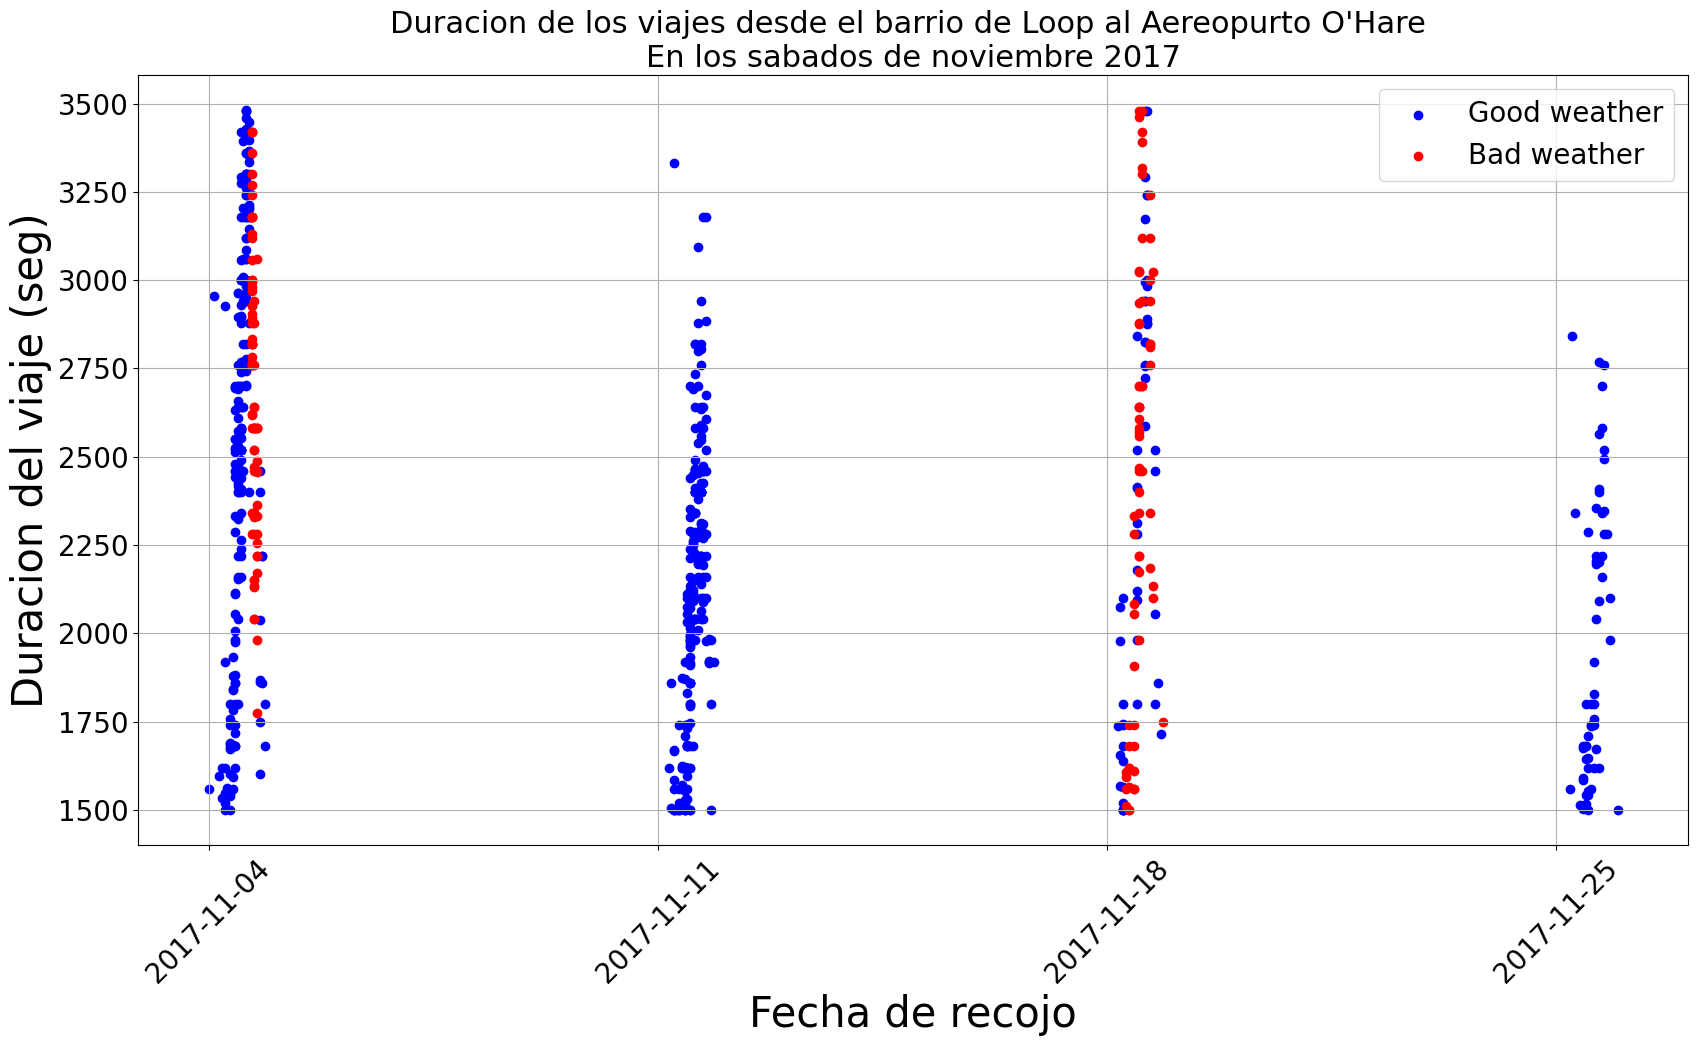

In [305]:
# Grafico de dispersion
plt.figure(figsize=(20,10))
plt.scatter(result_07.query("weather_conditions == 'Good'")['start_ts'], 
            result_07.query("weather_conditions == 'Good'")['duration_seconds'],
            c='Blue', label='Good weather')
plt.scatter(result_07.query("weather_conditions == 'Bad'")['start_ts'], 
            result_07.query("weather_conditions == 'Bad'")['duration_seconds'],
            c='Red', label='Bad weather')
plt.title("Duracion de los viajes desde el barrio de Loop al Aereopurto O'Hare \n"
          "En los sabados de noviembre 2017",
          fontsize=22)
plt.legend(fontsize=20)
plt.ylabel("Duracion del viaje (seg)", fontsize=30)
plt.xlabel('Fecha de recojo', fontsize=30)
plt.xticks(sql_result_07['start_ts'].dt.date.unique(), fontsize=20, rotation=45)
plt.yticks(fontsize=20)
plt.grid()
plt.show()

De la evaluacion de cada `Sabado` de noviembre de 2017, hay un grupo alargado de puntos en los datos. De estos grupos, podemos observar lo siguiente:

- El primer y tercer sabado han sido `dia lluvioso (Mal clima)`, aunque no todos los viajes se dieron con esta condicion.
- El segundo sabado tiene más recorridos que duran entre 1500 y 3000 segundos, en comparación con el tecer y cuarto sabado.

En resumen, hemos llegado a dos conclusiones. En primer lugar, hay variaciones en la duración de los viajes dentro de cada grupo, pero las condiciones meteorológicas no parecen ser la causa principal. Esto sugiere que puede haber otros factores externos que afecten a la duración de los viajes, como el tráfico en las horas pico. 

En segundo lugar, hay variaciones en los límites superiores de la duración de los viajes entre los grupos. Estas variaciones parecen ocurrir en paralelo con la situación meteorológica general del sabado. `Por lo tanto, nuestra hipótesis es que la duración media del viaje es mayor los sabados lluvioso no puede ser rechazasa`

<h2>7.- CONCLUSIONES 

En este proyecto, analizamos los datos de viajes compartidos de los SABADOS de noviembre de 2017. Primero, identificamos a los socios comerciales más exitosos, destacando a Flash Cab como la compañía de taxis líder, con casi el doble de viajes que su competidor más cercano. También observamos que la mayoría de nuestros clientes se dirigían al vecindario Loop. Luego, investigamos cómo las condiciones climáticas influían en las duraciones de los viajes. Los análisis mostraron que los viajes eran más largos los días lluviosos. Nuestra prueba de hipótesis confirmó que las duraciones de los viajes eran significativamente diferentes entre los días con buen y mal tiempo. Una posible explicación es que, en días lluviosos, las personas tienden a ser mas cuidadosas al conducir y disminuyen su velocidad, lo que aumenta el tiempo del viaje, otra mas puede ser que las más personas optan por taxis o transporte privado, lo que aumenta el trafico.